### 导入需要的库

In [11]:
import numpy as np # 科学计算
import pandas as pd # 数据分析
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set()

# 数据可视化代码
from titanic_visualizations import survival_stats
from IPython.display import display
%matplotlib inline

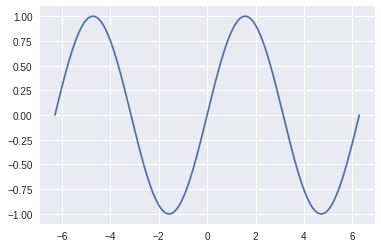

In [12]:
X = np.linspace(-2*np.pi, 2*np.pi, 1000)
y = np.sin(X)
plt.plot(X, y)
plt.show()

### 导入数据

In [13]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

outcomes = train['Survived']
data = train.drop('Survived', axis = 1)

- **Survived**：是否存活（0代表否，1代表是）
- **Pclass**：社会阶级（1代表上层阶级，2代表中层阶级，3代表底层阶级）
- **Name**：船上乘客的名字
- **Sex**：船上乘客的性别
- **Age**：船上乘客的年龄（可能存在 `NaN`）
- **SibSp**：乘客在船上的兄弟姐妹和配偶的数量
- **Parch**：乘客在船上的父母以及小孩的数量
- **Ticket**：乘客船票的编号
- **Fare**：乘客为船票支付的费用
- **Cabin**：乘客所在船舱的编号（可能存在 `NaN`）
- **Embarked**：乘客上船的港口（C 代表从 Cherbourg 登船，Q 代表从 Queenstown 登船，S 代表从 Southampton 登船）

In [14]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## 乘客的生存率

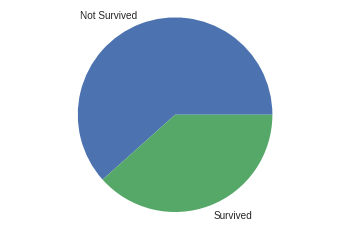

0    549
1    342
Name: Survived, dtype: int64

In [18]:
# 乘客幸存率约为38%（342/891）
sur_counts = train['Survived'].value_counts()
label = 'Not Survived', 'Survived',
plt.pie(sur_counts, labels=label)
plt.axis('equal')
plt.show()
sur_counts

### PClass变量：探索与Survived的关系

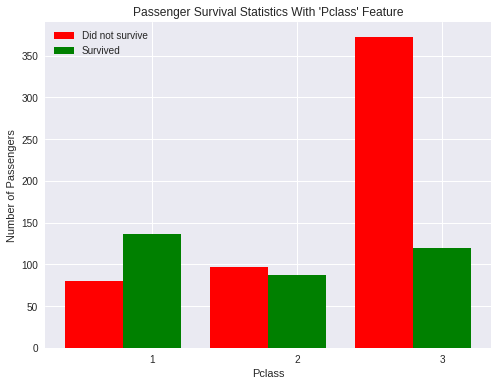

In [19]:
survival_stats(data, outcomes, 'Pclass')

可见，Pclass为1的大部分幸存，Pclass为2的接近一半幸存，Pclass为3的小部分幸存

###  Name变量：将变量中有关Title的信息抽取出来

In [21]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [22]:
test['Survived'] = np.nan
combi = pd.concat([train, test])
combi.index = np.arange(1309)
# combi.info()

In [23]:
import re
combi['Title'] = combi['Name'].apply(lambda x: re.split(',|\.', x)[1].strip())
combi.loc[combi['Title'].isin(['Mme', 'Mlle']), 'Title'] = 'Mlle'
combi.loc[combi['Title'].isin(['Capt', 'Don', 'Major', 'Sir']), 'Title'] = 'Sir'
combi.loc[combi['Title'].isin(['Dona', 'Lady', 'the Countess', 'Jonkheer']), 'Title'] = 'Lady'

In [27]:
combi.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr


<img src="http://192.168.2.107:8888/notebooks/myworkspace/Titanic/title.png">

可见，Title为Mrs和Miss的幸存率比较大，为Mr的幸存率比较小

### Sex变量：探索与Survived的关系

In [12]:
# # 女性乘客的比例约为35%（577/314）
# sex_counts = train['Sex'].value_counts()
# label = 'male', 'female',
# plt.pie(sex_counts, labels=label)
# plt.axis('equal')
# plt.show()
# sex_counts

In [13]:
# # 分别得出男女乘客幸存比例
# # 由图我们可以得知，在训练集中，绝大多数女性乘客（233/314）活了下来，男性乘客中也幸存了一小部分（109/577）
# # 0.74 0.18
# key = 'Sex'
# values = ['male', 'female']
# frame = pd.DataFrame(index = np.arange(len(values)), columns=(key, 'Survived', 'NSurvived'))

# for i, value in enumerate(values):
#             frame.loc[i] = [value, \
#                    len(train[(train['Survived'] == 1) & (train[key] == value)]), \
#                    len(train[(train['Survived'] == 0) & (train[key] == value)])]
        
# bar_width = 0.4

# for i in np.arange(len(frame)):
#     nonsurv_bar = plt.bar(i-bar_width, frame.loc[i]['NSurvived'], width = bar_width, color = 'r')
#     surv_bar = plt.bar(i, frame.loc[i]['Survived'], width = bar_width, color = 'g')

#     plt.xticks(np.arange(len(frame)), values)
#     plt.legend((nonsurv_bar[0], surv_bar[0]),('Did not survive', 'Survived'), framealpha = 0.8)

# plt.xlabel(key)
# plt.ylabel('Number of Passengers')
# plt.title('Passenger Survival Statistics With \'%s\' Feature'%(key))
# plt.show()
# frame

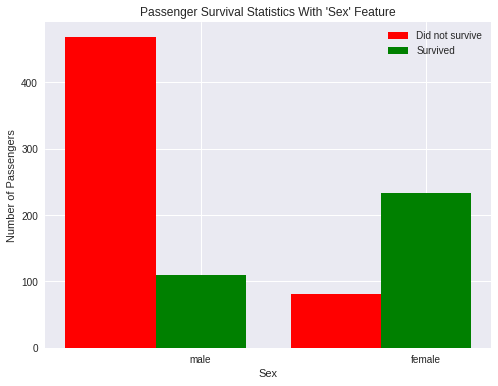

In [14]:
survival_stats(data, outcomes, 'Sex')

可见，女性的幸存率远远大于男性

### Age变量：探索与Survived的关系

In [15]:
# train.count()

In [16]:
# train['Child'] = 0
# train['Child'] = list(map(lambda x: 1 if x<18 else 0, train['Age']))
# test['Child'] = 0
# test['Child'] = list(map(lambda x: 1 if x<18 else 0, test['Age']))

In [17]:
# train.head()

In [18]:
# test.head()

In [19]:
# male_child_survived = len(train.loc[(train['Sex'] == 'male') & (train['Child'] == 1) & (train['Survived'] == 1)])
# male_child = len(train.loc[(train['Sex'] == 'male') & (train['Child'] == 1)])
# male_adult_survived = len(train.loc[(train['Sex'] == 'male') & (train['Child'] == 0) & (train['Survived'] == 1)])
# male_adult = len(train.loc[(train['Sex'] == 'male') & (train['Child'] == 0)])

# female_child_survived = len(train.loc[(train['Sex'] == 'female') & (train['Child'] == 1) & (train['Survived'] == 1)])
# female_child = len(train.loc[(train['Sex'] == 'female') & (train['Child'] == 1)])
# female_adult_survived = len(train.loc[(train['Sex'] == 'female') & (train['Child'] == 0) & (train['Survived'] == 1)])
# female_adult = len(train.loc[(train['Sex'] == 'female') & (train['Child'] == 0)])

# grouped = train.groupby(['Child', 'Sex'])
# grouped['Survived'].agg(lambda x: sum(x)/len(x))

In [20]:
# bar_width = 0.8
# index = np.arange(4)
# data = [male_child_survived/male_child, male_adult_survived/male_adult, female_child_survived/female_child, female_adult_survived/female_adult]

# plt.bar(index, data, bar_width)
# plt.xticks(index, ('male child', 'male adult', 'female child', 'female adult'))
# plt.ylabel('survival rate')
# plt.show()

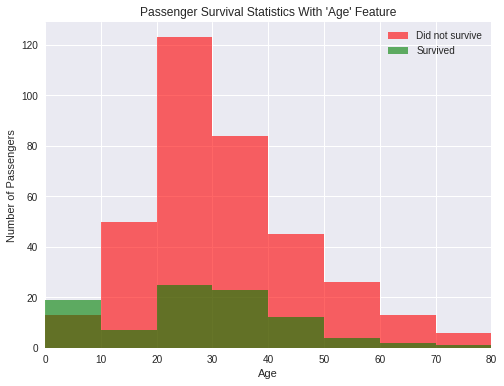

In [21]:
survival_stats(data, outcomes, 'Age', ["Sex == 'male'"])

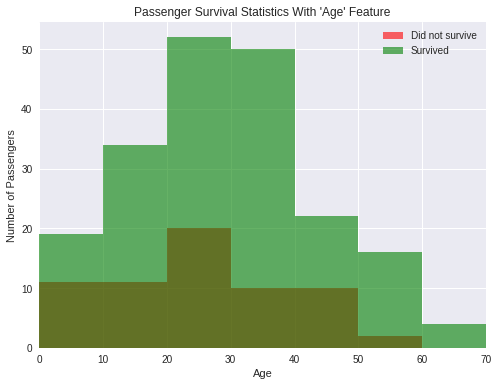

In [22]:
survival_stats(data, outcomes, 'Age', ["Sex == 'female'"])

可见，未成年人的幸存率要远远高于青壮年

### SibSp变量：探索与Survived的关系

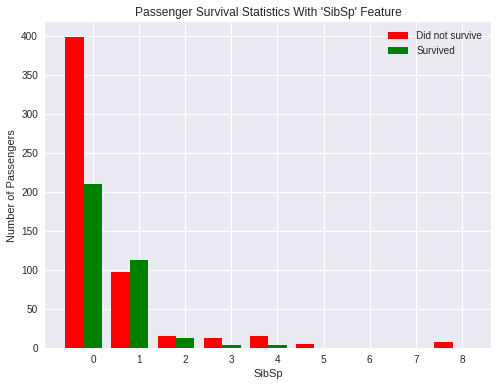

In [23]:
survival_stats(data, outcomes, 'SibSp')

可见，SibSp(在船上的兄弟姐妹和配偶的数量)为1或2的乘客幸存率最高

### Parch变量：探索与Survived的关系

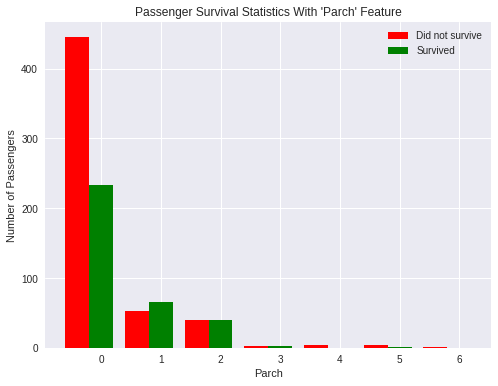

In [24]:
survival_stats(data, outcomes, 'Parch')

可见，Parch(在船上的父母以及小孩的数量)为1到3的乘客幸存率最高

### FamilySize变量：新增变量，探索与Survived的关系

In [25]:
combi['FamilySize']= combi['SibSp'] + combi['Parch'] + 1

<img src="http://192.168.2.107:8888/notebooks/myworkspace/Titanic/FamilySize.png">

FamilySize为2到4的乘客幸存率最高

### Fare变量：探索与Survived的关系

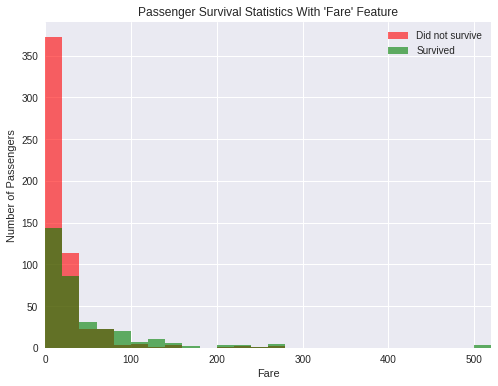

In [27]:
survival_stats(data, outcomes, 'Fare')

可见，票价越高幸存率越高

### Embarked变量：探索与Survived的关系

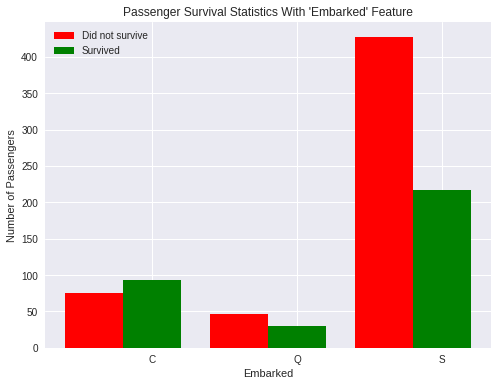

Passengers with missing 'Embarked' values: 2 (2 survived, 0 did not survive)


In [28]:
survival_stats(data, outcomes, 'Embarked')

可见，Embarked（登录口岸）为C的幸存率最高

### 填补缺失值

In [29]:
combi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 13 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Title          1309 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 143.2+ KB


#### Fare只有1个缺失值，采取中位数填补法

In [29]:
combi[combi['Fare'].isnull()] = combi['Fare'].median()

#### Embarked有2个缺失值，先将这两个缺失值对应的乘客信息选取出来

In [30]:
combi.loc[combi['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,FamilySize
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0.0,62.0,1.0,female,0.0,1.0,113572,Miss,1.0
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0.0,830.0,1.0,female,0.0,1.0,113572,Mrs,1.0


发现Pclass都为1，Fare都为80。

In [31]:
combi.loc[(combi['Embarked'] == 'C') & (combi['Pclass'] == 1.0), 'Fare'].median()
# combi.loc[(combi['Embarked'] == 'Q') & (combi['Pclass'] == 1.0), 'Fare'].median() # 90.0
# combi.loc[(combi['Embarked'] == 'S') & (combi['Pclass'] == 1.0), 'Fare'].median() # 52.0

76.7292

In [32]:
# 发现Embarked为C的Pclass属于1的Fare中位数正好是80，所以将缺失值填补为C
combi.loc[combi['Embarked'].isnull(), 'Embarked'] = 'C'

#### Cabin的缺失值较多，目前来看对预测没有什么意义，先忽略。

In [33]:
combi['Cabin'].head(10)

0     NaN
1     C85
2     NaN
3    C123
4     NaN
5     NaN
6     E46
7     NaN
8     NaN
9     NaN
Name: Cabin, dtype: object

#### 最后就是要预测填补Age的缺失值，这里用到了决策树方法，先看一下已有年龄的分布：

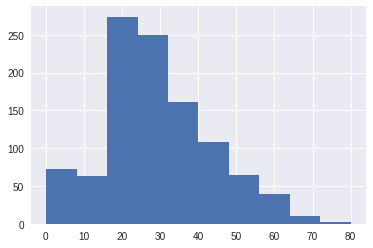

In [33]:
plt.hist(combi.loc[combi['Age'].notnull(), 'Age'])
plt.show()

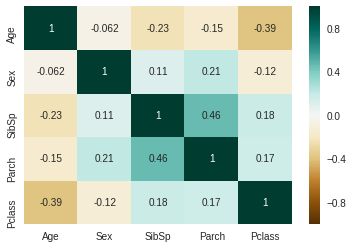

In [34]:
data = combi.copy()
data["Sex"] = data["Sex"].map({"male": 0, "female":1})
g = sns.heatmap(data[["Age","Sex","SibSp","Parch","Pclass"]].corr(),cmap="BrBG",annot=True)

In [35]:
combi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 14 columns):
Age            1046 non-null float64
Cabin          296 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null float64
PassengerId    1309 non-null float64
Pclass         1309 non-null float64
Sex            1309 non-null object
SibSp          1309 non-null float64
Survived       892 non-null float64
Ticket         1309 non-null object
Title          1309 non-null object
FamilySize     1309 non-null float64
dtypes: float64(8), object(6)
memory usage: 153.4+ KB


#### 预测年龄

In [36]:
from sklearn import tree
from sklearn.feature_extraction import DictVectorizer

X_train = combi.loc[combi['Age'].notnull(), ['Pclass', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title', 'FamilySize']]
y_train = combi.loc[combi['Age'].notnull(), 'Age']
X_test = combi.loc[combi['Age'].isnull(), ['Pclass', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title', 'FamilySize']]

dict_vec = DictVectorizer(sparse=False)
X_train = dict_vec.fit_transform(X_train.to_dict(orient="record"))
X_test = dict_vec.transform(X_test.to_dict(orient="record"))

clf = tree.DecisionTreeRegressor()
clf.fit(X_train, y_train)
combi.loc[combi['Age'].isnull(), 'Age'] = clf.predict(X_test)

### 特征选择

### 建模

这里用的模型是随机森林

In [37]:
train = combi[0:891]
train.index = np.arange(891)
test = combi[891:1309]
test.index = np.arange(418)
X_train = train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title', 'FamilySize']]
# X_train = train[['Pclass', 'Sex', 'Age', 'Fare', 'Title', 'FamilySize']]
y_train = train['Survived']
X_test = test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title', 'FamilySize']]
# X_test = test[['Pclass', 'Sex', 'Age', 'Fare', 'Title', 'FamilySize']]

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction import DictVectorizer

dict_vec = DictVectorizer(sparse=False)
X_train = dict_vec.fit_transform(X_train.to_dict(orient="record"))
X_test = dict_vec.transform(X_test.to_dict(orient="record"))
# dict_vec.feature_names_

# 使用默认配置的RandomForestClassifier进行预测操作。
clf = RandomForestClassifier() # 
clf.fit(X_train, y_train)
rfc_y_predict = clf.predict(X_test)
rfc_submission = pd.DataFrame({"PassengerId": test['PassengerId'].astype('int'), "Survived": rfc_y_predict.astype('int')})

# 将默认配置的RandomForestClassifier对测试数据的预测结果存储在文件rfc_submission.csv中。
rfc_submission.to_csv("./rfc_submission.csv", index=False)

<img src="http://192.168.2.107:8888/notebooks/myworkspace/Titanic/scored1.png">

#### 调参

K折交叉验证（K-fold cross validation）

<img src="http://192.168.2.107:8888/notebooks/myworkspace/Titanic/kfold.png">

In [97]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

kfold = StratifiedKFold(n_splits=10)

# RFC Parameters tunning 
RFC = RandomForestClassifier()

## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300, 500, 700, 900, 1000],
              "criterion": ["gini"]}

gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 10 folds for each of 162 candidates, totalling 1620 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   34.9s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  3.1min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  5.7min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed: 10.5min
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed: 16.4min
[Parallel(n_jobs=4)]: Done 1620 out of 1620 | elapsed: 21.6min finished


0.83726150392817056

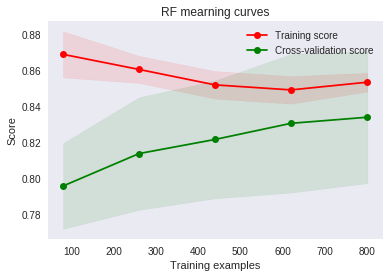

In [98]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """学习曲线"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(gsRFC.best_estimator_,"RF mearning curves",X_train,y_train,cv=kfold)

In [99]:
RFC_y_predict = gsRFC.predict(X_test)
RFC_submission = pd.DataFrame({"PassengerId": test['PassengerId'].astype('int'), "Survived": RFC_y_predict.astype('int')})

# 将默认配置的RandomForestClassifier对测试数据的预测结果存储在文件rfc_submission.csv中。
RFC_submission.to_csv("./RFC_submission.csv", index=False)

<img src="http://192.168.2.107:8888/notebooks/myworkspace/Titanic/scored.png">

### test

In [40]:
# train.describe()

In [41]:
# # 30+、20-30、10-20、<10
# def fare_to_flag(fare):
#     if fare >= 30:
#         return '30+'
#     elif 20 <= fare < 30:
#         return '20-30'
#     elif 10 <= fare < 20:
#         return '10-20'
#     else:
#         return '<10'

# train['Fare2'] = train['Fare'].map(fare_to_flag)
# test['Fare2'] = test['Fare'].map(fare_to_flag)

In [42]:
# train.head()

In [43]:
# test.head()

In [44]:
# grouped = train.groupby(['Fare2', 'Pclass', 'Sex'])
# grouped['Survived'].agg(lambda x: sum(x)/len(x))

In [45]:
# test['Survived'] = 0

In [46]:
# test.head()

In [47]:
# test.loc[test['Sex'] == 'female', 'Survived'] = 1
# test.loc[(test['Sex'] == 'female') & (test['Pclass'] == 3) & (test['Fare'] >= 20), 'Survived'] = 0

In [48]:
# test.head()

In [49]:
# frist_try_submission = test.loc[:, ['PassengerId', 'Survived']]
# frist_try_submission.to_csv("./frist_try_submission.csv", index=False)

## 随机森林

In [50]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [51]:
# train.head()

In [52]:
# sur = test['Survived']
# test = test.drop(['Survived'], axis=1)
# test.insert(1, 'Survived', )
test['Survived'] = np.nan

In [53]:
# test.head()

In [54]:
combi = pd.concat([train, test])
combi.index = np.arange(1309)

In [55]:
# combi.info()

In [56]:
# combi.head()

In [57]:
# combi.tail()

In [58]:
import re
combi['Title'] = combi['Name'].apply(lambda x: re.split(',|\.', x)[1].strip())

In [59]:
# combi.head()

In [60]:
# combi['Title'].value_counts()

In [61]:
combi.loc[combi['Title'].isin(['Mme', 'Mlle']), 'Title'] = 'Mlle'
combi.loc[combi['Title'].isin(['Capt', 'Don', 'Major', 'Sir']), 'Title'] = 'Sir'
combi.loc[combi['Title'].isin(['Dona', 'Lady', 'the Countess', 'Jonkheer']), 'Title'] = 'Lady'

In [62]:
combi[combi['Title'].isin(['Capt', 'Don', 'Major', 'Sir'])]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
30,40.0,NaN,C,27.7208,"Uruchurtu, Don. Manuel E",0,31,1,male,0,0.0,PC 17601,Sir
449,52.0,C104,S,30.5000,"Peuchen, Major. Arthur Godfrey",0,450,1,male,0,1.0,113786,Sir
536,45.0,B38,S,26.5500,"Butt, Major. Archibald Willingham",0,537,1,male,0,0.0,113050,Sir
599,49.0,A20,C,56.9292,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",0,600,1,male,1,1.0,PC 17485,Sir
745,70.0,B22,S,71.0000,"Crosby, Capt. Edward Gifford",1,746,1,male,1,0.0,WE/P 5735,Sir


In [63]:
# combi['Title'].value_counts()

In [64]:
combi['FamilySize']= combi['SibSp'] + combi['Parch'] + 1

In [65]:
# combi.head()

In [66]:
import re
combi['Surname'] = combi['Name'].apply(lambda x: re.split(',|\.', x)[0].strip())

In [67]:
# combi.head()

In [68]:
combi['FamilyID'] = combi['FamilySize'].astype('str') + combi['Surname']

In [69]:
combi.loc[combi['FamilySize'] <= 2, 'FamilyID'] = 'Small'

In [70]:
# combi.head()

In [71]:
famIDs = combi['FamilyID'].value_counts()
# famIDs

In [72]:
combi.loc[combi['FamilyID'].isin(list(famIDs[famIDs<=2].index)), 'FamilyID'] = 'Small'

In [73]:
# combi['FamilyID'].value_counts()

In [74]:
# combi.info()

In [75]:
combi.loc[combi['Embarked'].isnull(), 'Embarked'] = 'S'

In [76]:
combi[combi['Fare'].isnull()] = combi['Fare'].median()

In [77]:
combi.loc[combi['Age'].isnull(), 'Age'] = combi['Age'].mean()
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestClassifier
# clf = DecisionTreeRegressor()
# X_train = combi.loc[combi['Age'].notnull(), ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title', 'FamilySize']]
# y_train = combi.loc[combi['Age'].notnull(), 'Age']
# X_test = combi.loc[combi['Age'].isnull(), ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title', 'FamilySize']]

# from sklearn.feature_extraction import DictVectorizer
# dict_vec = DictVectorizer(sparse=False)
# X_train = dict_vec.fit_transform(X_train.to_dict(orient="record"))
# X_test = dict_vec.transform(X_test.to_dict(orient="record"))

# clf.fit(X_train, y_train)
# combi.loc[combi['Age'].isnull(), 'Age'] = clf.predict(X_test)

In [78]:
combi.isnull().any()

Age            False
Cabin           True
Embarked       False
Fare           False
Name           False
Parch          False
PassengerId    False
Pclass         False
Sex            False
SibSp          False
Survived        True
Ticket         False
Title          False
FamilySize     False
Surname        False
FamilyID       False
dtype: bool

In [79]:
combi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 16 columns):
Age            1309 non-null float64
Cabin          296 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null float64
PassengerId    1309 non-null float64
Pclass         1309 non-null float64
Sex            1309 non-null object
SibSp          1309 non-null float64
Survived       892 non-null float64
Ticket         1309 non-null object
Title          1309 non-null object
FamilySize     1309 non-null float64
Surname        1309 non-null object
FamilyID       1309 non-null object
dtypes: float64(8), object(8)
memory usage: 173.9+ KB


In [80]:
train = combi[0:891]
train.index = np.arange(891)
test = combi[891:1309]
test.index = np.arange(418)
# X_train = train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title', 'FamilySize', 'FamilyID']]
X_train = train[['Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked', 'Title', 'FamilySize', 'FamilyID']]
y_train = train['Survived']
# X_test = test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title', 'FamilySize', 'FamilyID']]
X_test = test[['Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked', 'Title', 'FamilySize', 'FamilyID']]

In [81]:
X_test.head()

,Pclass,Sex,Age,SibSp,Fare,Embarked,Title,FamilySize,FamilyID
0,3.0,male,34.5,0.0,7.8292,Q,Mr,1.0,Small
1,3.0,female,47.0,1.0,7.0000,S,Mrs,2.0,Small
2,2.0,male,62.0,0.0,9.6875,Q,Mr,1.0,Small
3,3.0,male,27.0,0.0,8.6625,S,Mr,1.0,Small
4,3.0,female,22.0,1.0,12.2875,S,Mrs,3.0,Small


In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation
from sklearn.model_selection import GridSearchCV

/home/longcd/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [83]:
parameters = {'n_estimators':[100, 200, 500, 800, 1000, 1500, 2000, 2500], 'min_samples_split':np.arange(2, 10)}
rfc = RandomForestClassifier()
clf = GridSearchCV(rfc, parameters)

In [84]:
from sklearn.feature_extraction import DictVectorizer
dict_vec = DictVectorizer(sparse=False)
X_train = dict_vec.fit_transform(X_train.to_dict(orient="record"))
X_test = dict_vec.transform(X_test.to_dict(orient="record"))

# dict_vec.feature_names_

In [85]:
# 使用默认配置的RandomForestClassifier进行预测操作。

clf.fit(X_train, y_train)
rfc_y_predict = clf.predict(X_test)
rfc_submission = pd.DataFrame({"PassengerId": test['PassengerId'].astype('int'), "Survived": rfc_y_predict.astype('int')})
# 将默认配置的RandomForestClassifier对测试数据的预测结果存储在文件rfc_submission.csv中。
rfc_submission.to_csv("./rfc_submission.csv", index=False)

In [86]:
clf

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 200, 500, 800, 1000, 1500, 2000, 2500], 'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [87]:
clf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=9, min_weight_fraction_leaf=0.0,
            n_estimators=800, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [88]:
clf.best_params_

{'min_samples_split': 9, 'n_estimators': 800}

In [89]:
np.arange(100, 2000, 200)

array([ 100,  300,  500,  700,  900, 1100, 1300, 1500, 1700, 1900])

In [90]:
np.arange()

TypeError: Required argument 'start' (pos 1) not found